In [173]:
#Rafaela Tonon 221026061

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

df = pd.read_csv('Formulario_T1_respostas.csv', parse_dates=['Carimbo de data/hora'])

df.columns = ['timestamp', 'idade', 'genero', 'pratica_atividade', 'dias_treino', 
              'tipo_atividade', 'meses_pratica', 'motivacao', 'autoestima', 
              'autoestima_melhorou', 'satisfacao_aparencia', 'sensacao_pos_treino', 
              'exercicio_humor']

In [174]:
# Frequências para variáveis categóricas
qual_vars = ['genero', 'pratica_atividade', 'dias_treino', 'tipo_atividade',
             'autoestima_melhorou', 'sensacao_pos_treino', 'exercicio_humor']

renomear_variaveis = {
    'genero': 'Gênero',
    'pratica_atividade': 'Prática de Atividade Física',
    'dias_treino': 'Número de Dias de Treino por Semana',
    'tipo_atividade': 'Tipo de Atividade',
    'autoestima_melhorou': 'Melhora na Autoestima com Treino',
    'sensacao_pos_treino': 'Sensação Positiva após o Treino',
    'exercicio_humor': 'Melhora do Humor/Ansiedade com Treino'
}

for i, var in enumerate(qual_vars, 1):
    freq = df[var].value_counts(normalize=True) * 100
    freq.name = 'Frequência (%)'

    display(
        freq.to_frame().style
            .format("{:.2f}")
            .set_caption(f'Tabela {i}: Frequência de {renomear_variaveis[var]}')
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([
                {
                    'selector': 'caption',
                    'props': [
                        ('font-size', '16px'),
                        ('font-weight', 'bold'),
                        ('text-align', 'center'),
                        ('margin-bottom', '10px')
                    ]
                }
            ])
    )

,Frequência (%)
Masculino,61.76
Feminino,35.29
Outro,2.94


,Frequência (%)
Sim,58.82
Não,41.18


,Frequência (%)
5 ou mais,32.35
0,29.41
3-4,20.59
1-2,17.65


,Frequência (%)
Musculação,29.41
Não pratico,26.47
Corrida/Caminhada,17.65
"Musculação, Corrida/Caminhada",8.82
"Musculação, Esporte coletivo (futebol, vôlei etc.)",5.88
"Musculação, Corrida/Caminhada, Treino funcional/Crossfit",2.94
"Musculação, Corrida/Caminhada, Outra",2.94
"Musculação, Corrida/Caminhada, Esporte coletivo (futebol, vôlei etc.)",2.94
"Musculação, Corrida/Caminhada, Yoga/Pilates",2.94


,Frequência (%)
Sim,41.18
Não treino,35.29
Talvez,14.71
Não,8.82


,Frequência (%)
Mais animado(a) e confiante,55.88
Não treino,26.47
Igual ao normal,17.65


,Frequência (%)
"Sim, com certeza",52.94
Não treino,23.53
Um pouco,23.53


In [175]:
#Estatísticas descritivas para variáveis numéricas
quant_vars = ['idade', 'meses_pratica', 'motivacao', 'autoestima', 'satisfacao_aparencia']
tabela = df[quant_vars].describe()

tabela.index = [
    'Contagem (n)',
    'Média',
    'Desvio padrão',
    'Valor mínimo',
    '1º Quartil (25%)',
    'Mediana (50%)',
    '3º Quartil (75%)',
    'Valor máximo'
]

tabela.columns = [
    'Idade',
    'Meses de Prática',
    'Motivação',
    'Autoestima',
    'Satisfação com a Aparência'
]

display(
    tabela.style
        .format("{:.2f}")
        .set_caption('Tabela 8: Estatísticas Descritivas das Variáveis Numéricas')
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {
                'selector': 'caption',
                'props': [
                    ('font-size', '16px'),
                    ('font-weight', 'bold'),
                    ('text-align', 'center'),
                    ('margin-bottom', '10px')
                ]
            }
        ])
)

,Idade,Meses de Prática,Motivação,Autoestima,Satisfação com a Aparência
Contagem (n),34.00,34.00,34.00,34.00,34.00
Média,28.26,19.47,2.59,6.09,3.00
Desvio padrão,8.14,39.31,1.44,2.62,1.07
Valor mínimo,17.00,0.00,1.00,0.00,1.00
1º Quartil (25%),23.00,0.00,1.00,4.25,2.00
Mediana (50%),27.00,4.00,2.00,7.00,3.00
3º Quartil (75%),29.75,15.75,4.00,8.00,4.00
Valor máximo,59.00,204.00,5.00,10.00,5.00


In [176]:
# Tabela 9: Estatísticas de Autoestima por Prática de Atividade
autoestima_stats = df.groupby('pratica_atividade')['autoestima'].agg(['mean', 'median', 'std', 'count'])

autoestima_stats = (
    autoestima_stats.reset_index()
    .rename(columns={
        'pratica_atividade': 'Pratica atividade?',
        'mean': 'Média',
        'median': 'Mediana',
        'std': 'Desvio Padrão',
        'count': 'Número de Respondentes'
    })
    .round(2)
)

tabela_autoestima = (
    autoestima_stats.style
    .set_caption('Tabela 9: Estatísticas de Autoestima por Prática de Atividade Física')
    .set_properties(**{'text-align': 'center'})
    .format({'Média': '{:.1f}', 'Mediana': '{:.1f}', 'Desvio Padrão': '{:.2f}'})
    .hide(axis='index')
    .highlight_max(subset=['Média'], color='lightgray')
    .highlight_max(subset=['Mediana'], color='lightgray')
    .highlight_max(subset=['Desvio Padrão'], color='lightgray')
    .highlight_max(subset=['Número de Respondentes'], color='lightgray')
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('font-size', '16px'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('margin-bottom', '10px')
        ]
    }])
)

tabela_autoestima

Pratica atividade?,Média,Mediana,Desvio Padrão,Número de Respondentes
Não,4.4,4.5,2.71,14
Sim,7.2,7.0,1.86,20


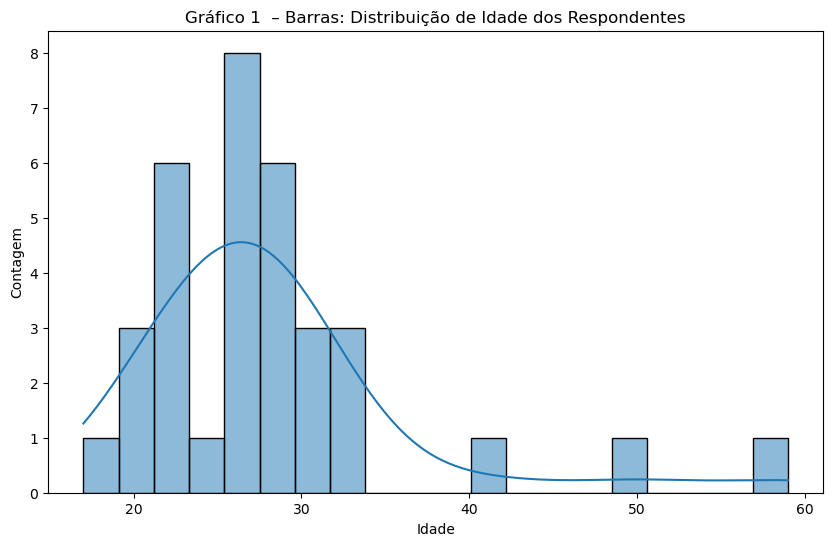

In [187]:
#Gráfico 1: Distribuição de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['idade'], bins=20, kde=True)
plt.title('Gráfico 1  – Barras: Distribuição de Idade dos Respondentes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.savefig("grafico1.jpg", dpi=300, bbox_inches="tight")
plt.show()

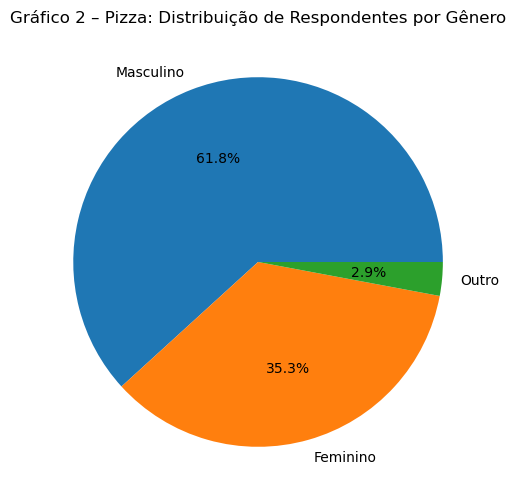

In [188]:
#Gráfico 2: Proporção por Gênero
plt.figure(figsize=(8, 6))
df['genero'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gráfico 2 – Pizza: Distribuição de Respondentes por Gênero')
plt.ylabel('')
plt.savefig("grafico2.jpg", dpi=300, bbox_inches="tight")
plt.show()

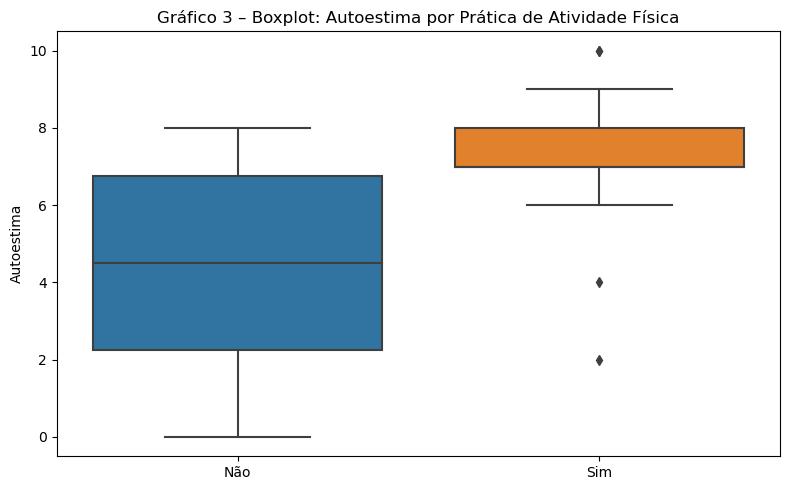

In [189]:
# Gráfico 3: Autoestima por prática de atividade física
plt.figure(figsize=(8, 5))
sns.boxplot(x='pratica_atividade', y='autoestima', data=df)
plt.title('Gráfico 3 – Boxplot: Autoestima por Prática de Atividade Física')
plt.xlabel('')
plt.ylabel('Autoestima')
plt.tight_layout()
plt.savefig("grafico3.jpg", dpi=300, bbox_inches="tight")
plt.show()

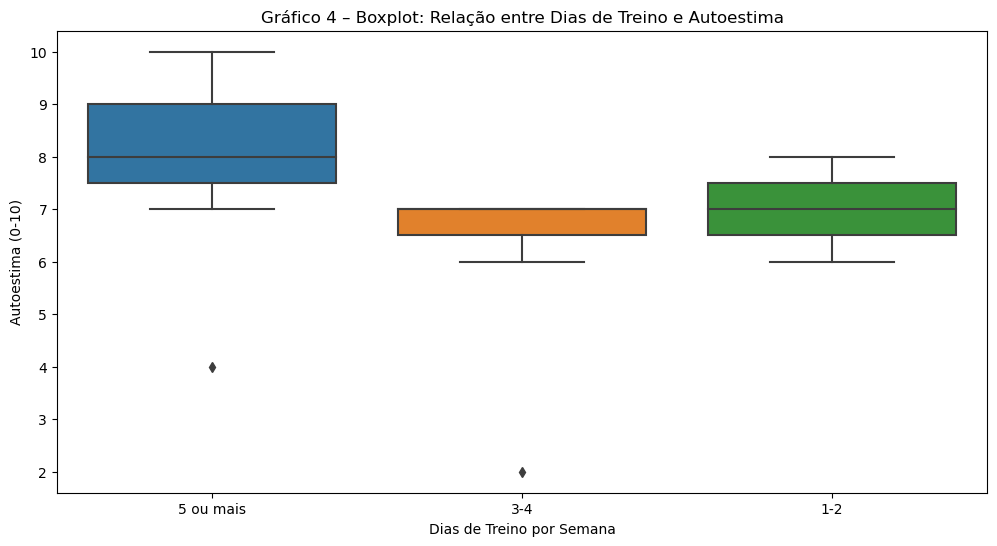

In [196]:
#Gráfico 4: Dias de Treino vs. Autoestima
plt.figure(figsize=(12, 6))
sns.boxplot(x='dias_treino', y='autoestima', data=df[df['pratica_atividade'] == 'Sim'])
plt.title('Gráfico 4 – Boxplot: Relação entre Dias de Treino e Autoestima')
plt.xlabel('Dias de Treino por Semana')
plt.ylabel('Autoestima (0-10)')
plt.savefig("grafico4.jpg", dpi=300, bbox_inches="tight")
plt.show()

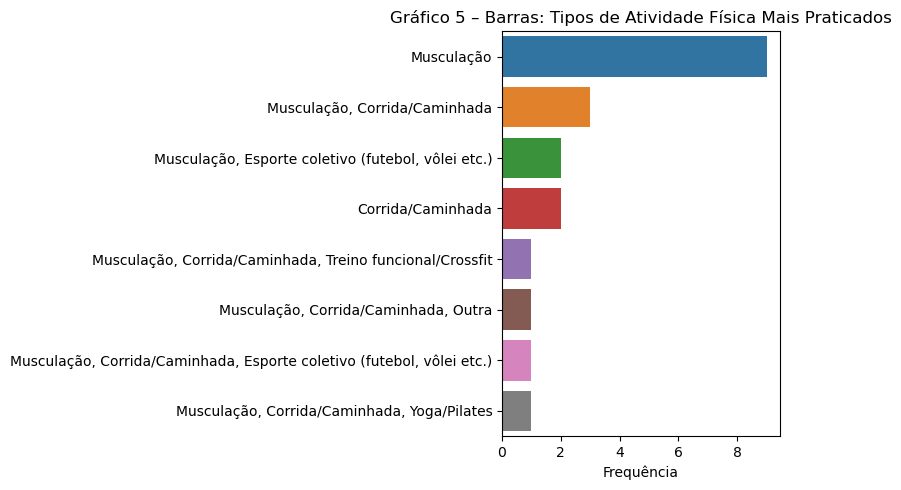

In [191]:
# Gráfico 5: Frequência dos tipos de atividade física (excluindo "Não pratico")
plt.figure(figsize=(8, 5))

dados_filtrados = df[(df['pratica_atividade'] == 'Sim') & (df['tipo_atividade'] != 'Não pratico')]

sns.countplot(y='tipo_atividade', 
             data=dados_filtrados, 
             order=dados_filtrados['tipo_atividade'].value_counts().index)

plt.title('Gráfico 5 – Barras: Tipos de Atividade Física Mais Praticados')
plt.xlabel('Frequência')
plt.ylabel('')
plt.tight_layout()
plt.savefig("grafico5.jpg", dpi=300, bbox_inches="tight")
plt.show()

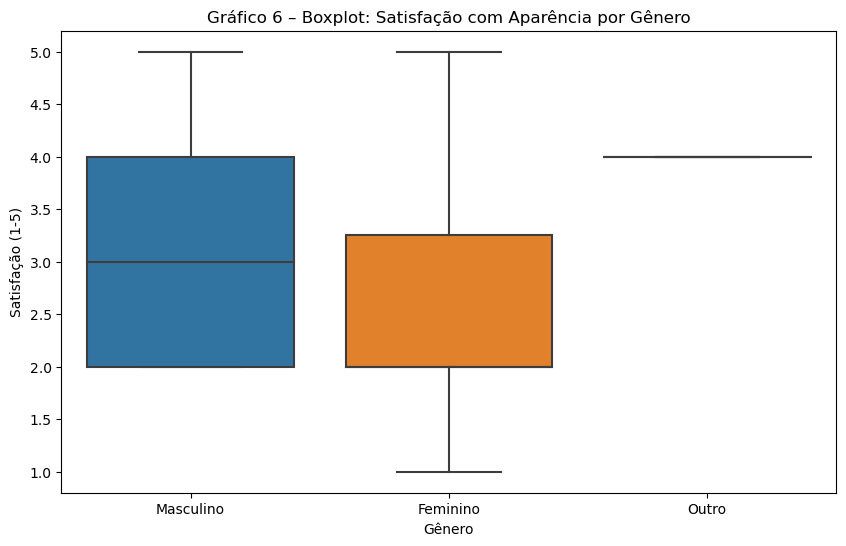

In [192]:
#Gráfico 6: Satisfação com Aparência por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='genero', y='satisfacao_aparencia', data=df)
plt.title('Gráfico 6 – Boxplot: Satisfação com Aparência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Satisfação (1-5)')
plt.savefig("grafico6.jpg", dpi=300, bbox_inches="tight")
plt.show()

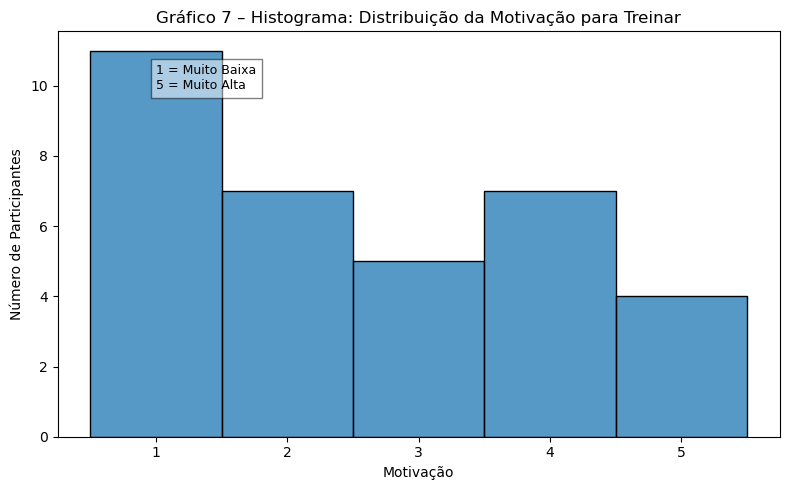

In [193]:
# Gráfico 7: Distribuição dos níveis de motivação com legenda
plt.figure(figsize=(8, 5))
sns.histplot(df['motivacao'].dropna(), bins=range(0, 7), discrete=True)
plt.title('Gráfico 7 – Histograma: Distribuição da Motivação para Treinar')
plt.xlabel('Motivação')
plt.ylabel('Número de Participantes')
plt.xticks(range(1, 6))

plt.text(1, df['motivacao'].value_counts().max() * 0.9,
         '1 = Muito Baixa\n5 = Muito Alta',
         fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.savefig("grafico7.jpg", dpi=300, bbox_inches="tight")
plt.show()

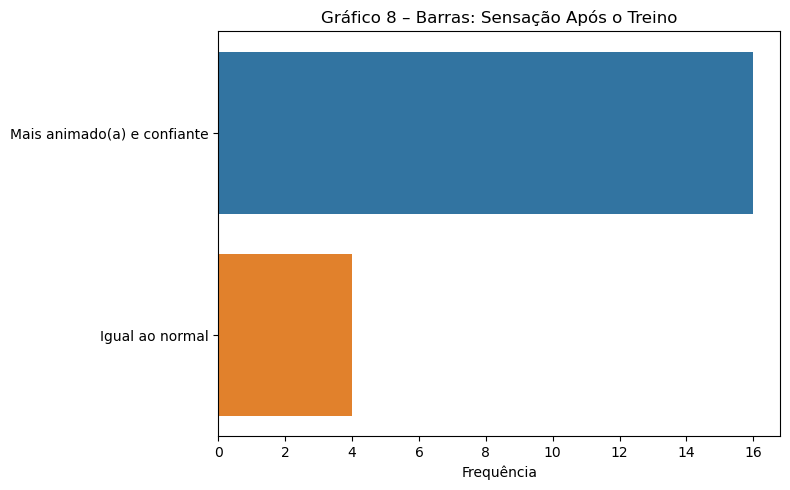

In [194]:
# Gráfico 8: Sensação após o treino (excluindo "Não treino")
plt.figure(figsize=(8, 5))

dados_filtrados = df[(df['pratica_atividade'] == 'Sim') & (df['sensacao_pos_treino'] != 'Não treino')]

sns.countplot(y='sensacao_pos_treino', 
             data=dados_filtrados, 
             order=dados_filtrados['sensacao_pos_treino'].value_counts().index)

plt.title('Gráfico 8 – Barras: Sensação Após o Treino')
plt.xlabel('Frequência')
plt.ylabel('')
plt.tight_layout()
plt.savefig("grafico8.jpg", dpi=300, bbox_inches="tight")
plt.show()

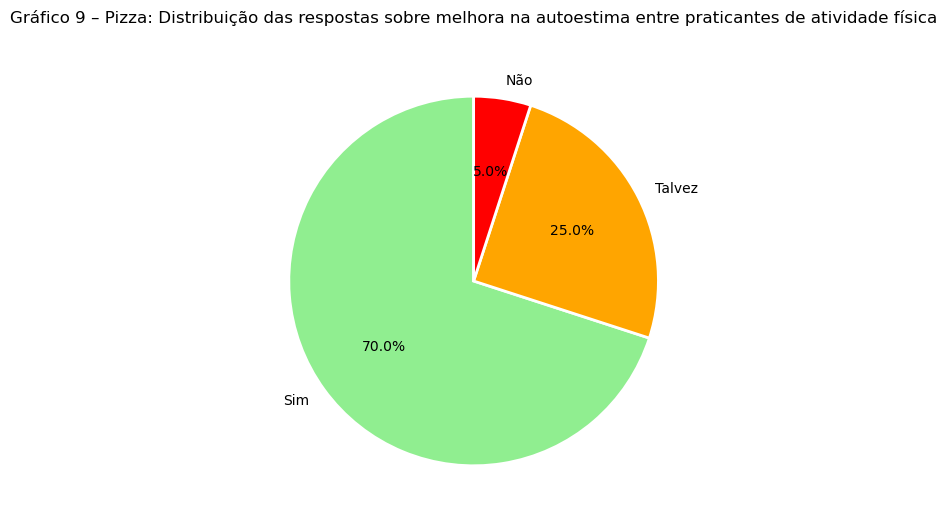

In [195]:
# Gráfico 9: Distribuição das Respostas sobre Melhora na Autoestima (excluindo "Não pratico")
dados = df[df['pratica_atividade'] == 'Sim']['autoestima_melhorou'].value_counts()

plt.figure(figsize=(8, 6))
dados.plot.pie(autopct='%1.1f%%', startangle=90, 
               colors=['lightgreen', 'orange', 'red', 'black'],
               wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.title('Gráfico 9 – Pizza: Distribuição das respostas sobre melhora na autoestima entre praticantes de atividade física', pad=20)
plt.ylabel('')
plt.savefig("grafico9.jpg", dpi=300, bbox_inches="tight")
plt.show()